# Airbnb EDA Project - Albany, New York


## Project Description:
This project analyzes Airbnb listings in Albany, New York using Exploratory Data Analysis (EDA).
The goal is to uncover trends in price, availability, location, and property type to provide valuable insights for decision-making.


In [3]:


# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('listings.csv')

# Display the first few rows of the dataset
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,621960198566758900,https://www.airbnb.com/rooms/621960198566758900,20250302010353,2025-03-02,city scrape,The Historic Jesse Buel Farmhouse w/ Heated Pool,4800ft of living space and an epic backyard ma...,"Walkable, Safe and quiet",https://a0.muscache.com/pictures/dd1a2e33-d50b...,382970529,...,5.00,4.87,5.00,NaN,f,12,2,10,0,0.47
1,932642358896439621,https://www.airbnb.com/rooms/932642358896439621,20250302010353,2025-03-02,city scrape,Stylish top floor apt w/parking,The whole group will enjoy easy access to ever...,Pine Hills Neighborhood in Albany NY is full o...,https://a0.muscache.com/pictures/prohost-api/H...,232967878,...,4.84,4.65,4.76,NaN,f,23,23,0,0,1.88
2,53567589,https://www.airbnb.com/rooms/53567589,20250302010353,2025-03-02,city scrape,Private Garden Apt in Downtown Albany|Pets All...,Discover Lark Street - A Hip Albany Neighborho...,If you visit Albany’s Capital Region without s...,https://a0.muscache.com/pictures/2e5b6926-a177...,433096110,...,4.96,4.79,4.86,NaN,f,4,4,0,0,6.40
3,20671966,https://www.airbnb.com/rooms/20671966,20250302010353,2025-03-02,city scrape,The Metropolitan,This full apartment is located on the 3rd floo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,98744672,...,4.98,4.93,4.87,NaN,f,8,2,6,0,0.51
4,24606880,https://www.airbnb.com/rooms/24606880,20250302010353,2025-03-02,city scrape,The Western Suite,"Located in a huge Victorian, this beautiful su...",NaN,https://a0.muscache.com/pictures/e8183a7b-a392...,98744672,...,4.96,4.96,4.88,NaN,f,8,2,6,0,0.62


## Data Cleaning

In [4]:

# Clean the 'price' column by removing non-numeric characters and converting to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
df.isnull().sum()

# Handle missing values by filling or dropping
df.fillna({'price': df['price'].mean(), 'availability_365': 0}, inplace=True)  # Example filling missing values

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove any rows where 'price' is an unrealistic value (outliers, if any)
df = df[df['price'] > 0]  # Filtering out rows where price is less than 0


## Exploratory Data Analysis (EDA)

### 1. Price Distribution by Neighbourhood


**Question:** How does the price vary across different neighbourhoods in Albany?
 We are interested in observing how the prices vary across different neighbourhoods. Higher prices in certain areas could indicate better amenities or location advantages.


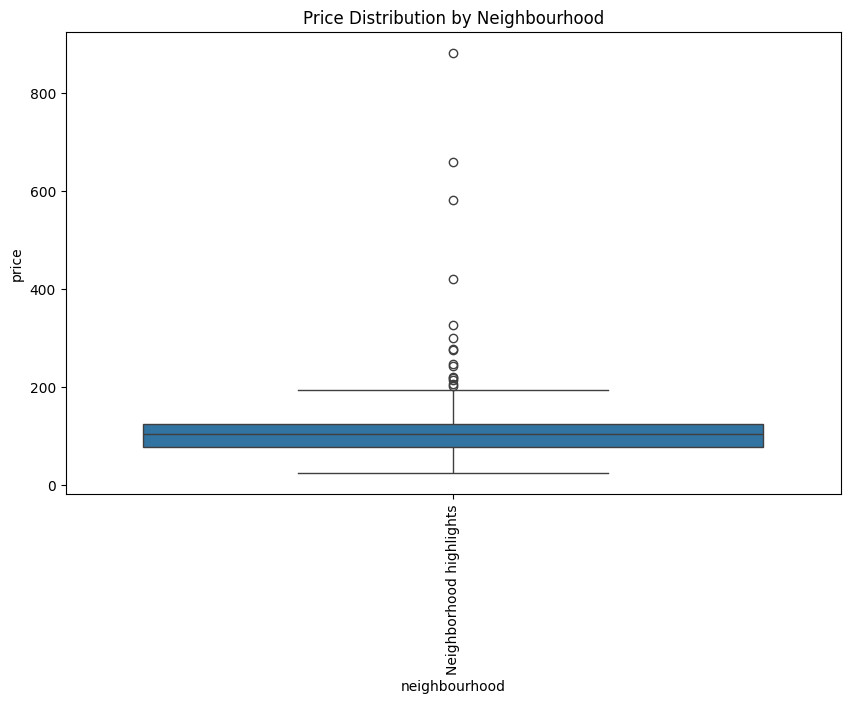

In [6]:

# Price distribution by neighbourhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighbourhood')
plt.show()


**Insight:**  
Most neighborhoods in Albany have a median price below \$150, with a few outliers reaching significantly higher values (above \$800). These high-priced outliers could be due to luxury listings or unique properties. The overall price distribution suggests that while most areas maintain similar pricing, there are exceptions likely influenced by specific neighborhood advantages or amenities.


### 2. Price Distribution by Property Type


**Question:** What is the price distribution for different property types? Does property type significantly affect the price?
 This graph will allow us to identify how different property types (e.g., apartment, house, etc.) vary in price. It helps us understand the demand for specific property types in Albany.


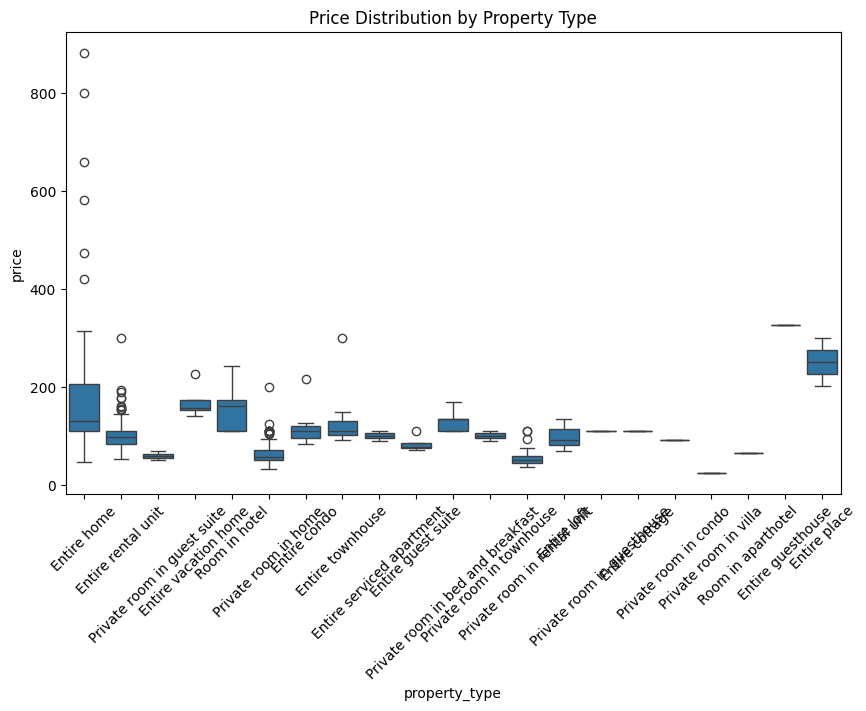

In [10]:

# Price distribution by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')
plt.show()


**Insight:**  
Property type has a clear impact on price. "Entire place" listings such as Entire home, Entire rental unit, and Entire guesthouse tend to have higher median prices compared to private rooms or shared spaces. Among them, listings like "Entire place" and "Entire guesthouse" show the highest price ranges, often exceeding \$200, with some outliers going above \$800. In contrast, private rooms in homes or condos are priced significantly lower, making them more budget-friendly options. This indicates that guests are willing to pay a premium for full privacy and larger spaces.


### 3. Correlation Analysis


**Question:** What are the correlations between price, availability, and review scores? Can we infer any relationships?
 The correlation matrix helps us understand how different variables like price, availability, and review scores are related. A high correlation between price and reviews could imply that higher-rated listings tend to be priced higher.


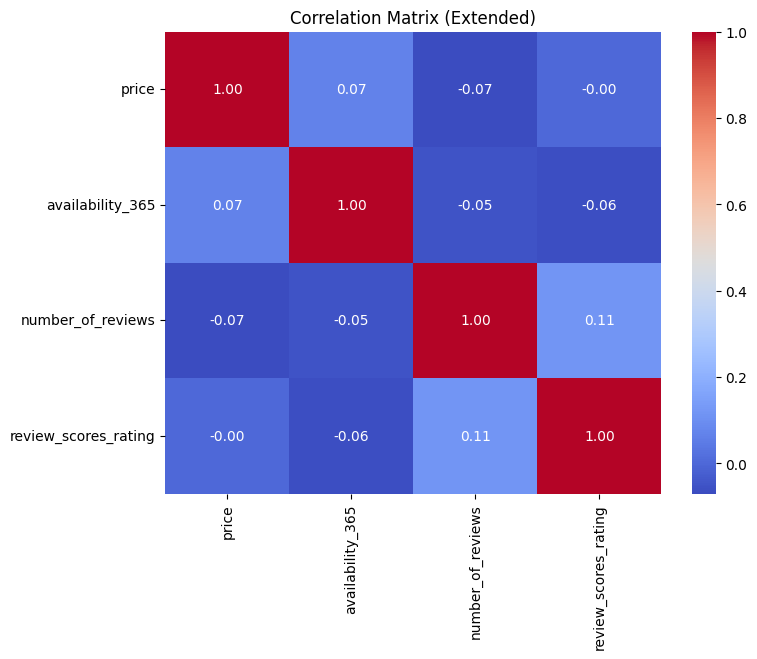

In [6]:

# Extended correlation matrix
corr_matrix = df[['price', 'availability_365', 'number_of_reviews', 'review_scores_rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Extended)')
plt.show()


**Insight:**  

The correlation matrix reveals that there are no strong linear relationships between the examined variables. Price shows almost zero correlation with review scores (`0.00`) and very weak correlations with both availability (`0.07`) and number of reviews (`-0.07`). This suggests that pricing is not significantly influenced by how available a listing is or how well it is reviewed. Additionally, the number of reviews has a slight positive correlation with review scores (`0.11`), implying that more reviewed listings tend to have slightly better ratings. However, all correlations are weak, indicating that other factors may play a larger role in influencing these variables.


### 4. Price vs Availability


**Question:** Is there any correlation between price and availability? Does a higher availability impact the price?
 A scatter plot between price and availability will give insights into whether availability of listings influences their pricing. If higher availability is linked to lower prices, it could suggest competitive pricing in less popular listings.


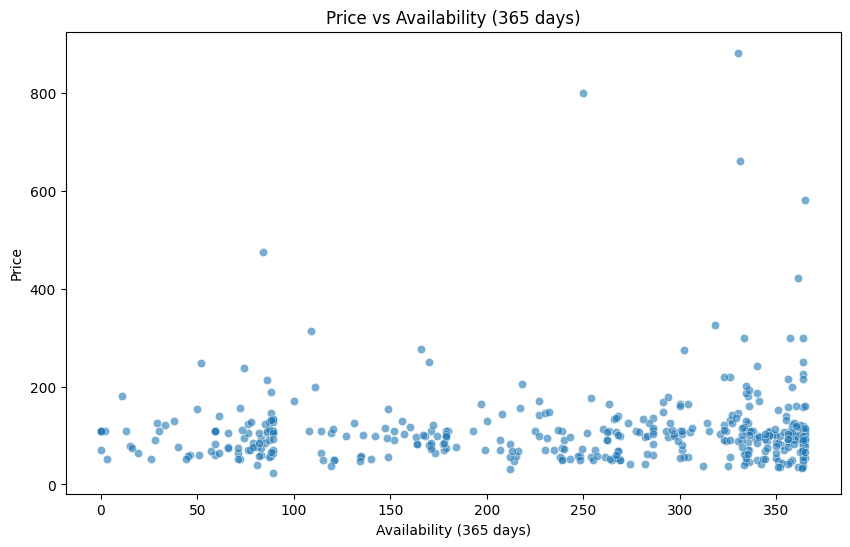

In [7]:

# Scatter plot: Price vs Availability_365
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6)
plt.title('Price vs Availability (365 days)')
plt.xlabel('Availability (365 days)')
plt.ylabel('Price')
plt.show()


#### Insight:

The scatter plot shows no clear relationship between price and availability. Listings with both low and high availability are spread across a wide range of prices, and high-priced listings appear at various availability levels. This suggests that availability (how many days a listing is active) does not significantly influence pricing strategies. Other factors—such as location, property type, or amenities—may have a stronger impact on price determination.


### 5. Combined Price Distribution by Neighbourhood and Property Type


**Question:** How does the price distribution vary when we consider both neighbourhood and property type together?
This combined boxplot will give us a deeper insight into how neighbourhoods and property types together affect the pricing of listings. This can help identify specific areas with high-demand property types.


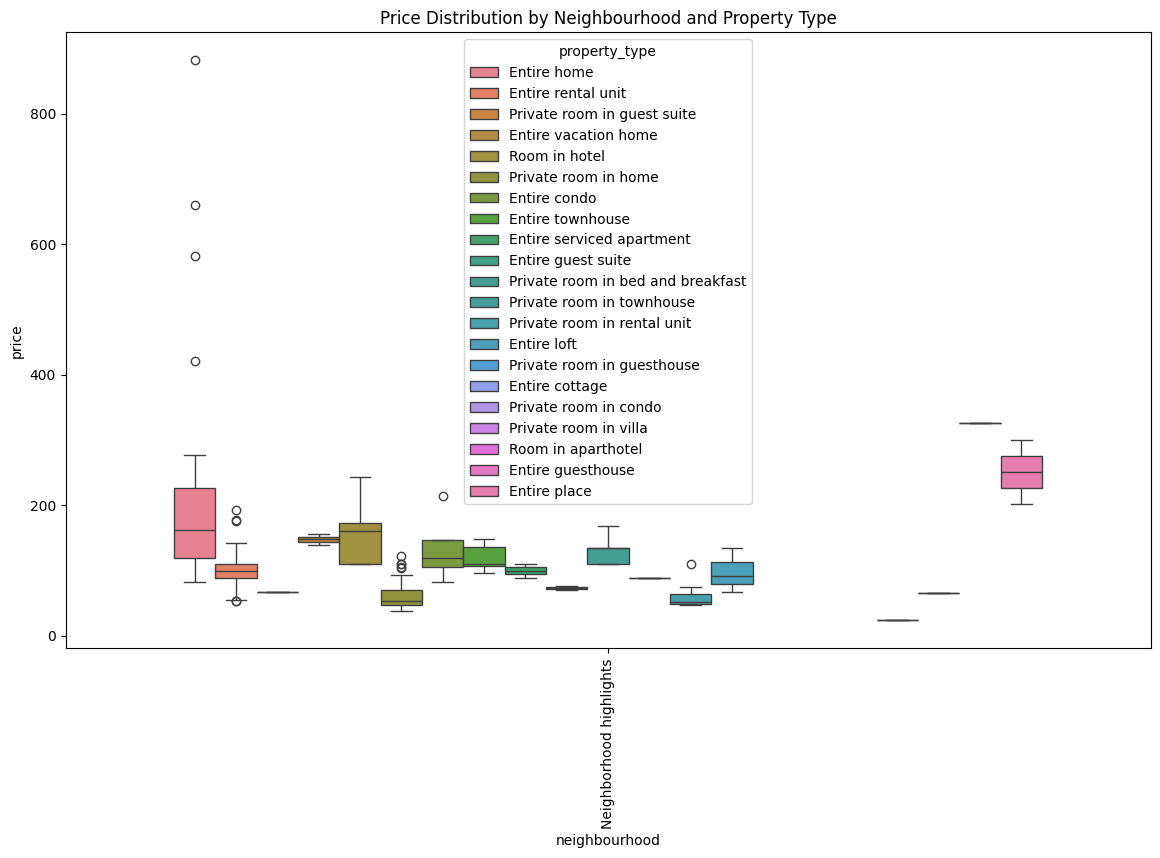

In [8]:

# Combined Price Distribution by Neighbourhood and Property Type
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', hue='property_type', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighbourhood and Property Type')
plt.show()


####  Insight:

Price variation is significantly influenced by both **neighbourhood** and **property type**. Some key observations:

- In most neighborhoods, **Entire homes** and **vacation homes** tend to be priced higher than **private rooms** or **shared accommodations**.
- The **"Neighbourhood highlights"** area shows a distinct price increase for **Entire guesthouses** and **Entire places**, indicating a premium market segment in that area.
- Certain property types such as **hotel rooms** and **apart-hotels** appear less frequently and tend to have consistent mid-to-high price ranges.
- Outliers in some neighborhoods (e.g., extremely high prices above $800) suggest the presence of luxury or premium listings that skew the distribution.

This implies that targeting specific property types in high-value neighborhoods could be a strategic opportunity for hosts seeking higher returns.


### 6. Seasonality of Availability


**Question:** Does availability show seasonal trends? Is there a month with high or low availability?
By plotting the availability of listings over different months, we can see if the availability changes seasonally. Seasonal trends could suggest periods of higher tourist demand and help in pricing strategies.


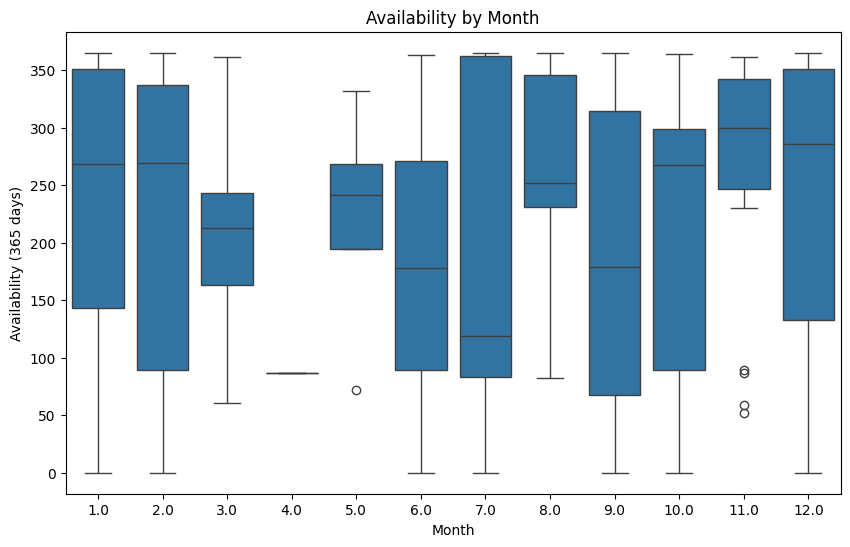

In [9]:

# First, create a 'month' column to simulate the trend over months
df['month'] = pd.to_datetime(df['last_review']).dt.month

# Plot availability by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='availability_365', data=df)
plt.title('Availability by Month')
plt.xlabel('Month')
plt.ylabel('Availability (365 days)')
plt.show()


**Insight:**

Availability appears relatively high and stable across most months, indicating no strong seasonal drop-offs in listing availability. However, there is a noticeable dip in the median availability during April (month 4), where listings are tightly clustered around low values, suggesting either a data issue or a genuine drop in supply during that period. On the other hand, January, February, July, and December show higher variability and higher median availability, which could point to hosts preparing listings for peak seasons like holidays or summer travel. Overall, availability remains fairly consistent, but the anomaly in April may warrant deeper investigation.
